Aplicando o classificador arvore de decisão Random Forest 

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data_origin = pd.read_csv(r"Base de Dados\sleep_cycle_productivity.csv")

data_origin.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [ ]:
variaveis = [   
    'Age',                                          
    'Total Sleep Hours',                                  
    'Exercise (mins/day)',             
    'Caffeine Intake (mg)',            
    'Screen Time Before Bed (mins)',    
    'Work Hours (hrs/day)',                  
]

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [58]:
data_origin['Qualidade_Sono'] = pd.cut(
    data_origin['Sleep Quality'],
    bins=[-1, 3, 7, 10],
    labels=['Ruim', 'Média', 'Boa']
)

In [30]:
data_origin['Qualidade_Sono'] = pd.cut(
    data_origin['Sleep Quality'],
    bins=[-1, 6, 10],      # Dois intervalos: (-1,6] e (6,10]
    labels=['Ruim', 'Bom']
)

In [37]:
data_origin['Produtividade'] = pd.cut(
    data_origin['Productivity Score'],
    bins=[-1, 6, 10],      # Dois intervalos: (-1,6] e (6,10]
    labels=['Ruim', 'Bom']
)

In [38]:
data_origin['Estresse'] = pd.cut(
    data_origin['Stress Level'],
    bins=[-1, 6, 10],      # Dois intervalos: (-1,6] e (6,10]
    labels=['Ruim', 'Bom']
)

In [40]:
data_origin['Humor'] = pd.cut(
    data_origin['Mood Score'],
    bins=[-1, 6, 10],      # Dois intervalos: (-1,6] e (6,10]
    labels=['Ruim', 'Bom']
)

In [59]:
variaveis = [
    'Age',                                           
    'Total Sleep Hours',                            
    'Exercise (mins/day)',             
    'Caffeine Intake (mg)',            
    'Screen Time Before Bed (mins)',    
    'Work Hours (hrs/day)',           
]
X = data_origin[variaveis]
y = data_origin ['Qualidade_Sono']
y2= data_origin ['Produtividade']
y3 = data_origin ['Estresse']
y4 = data_origin['Humor']




In [60]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
importancias = modelo.feature_importances_

for nome, importancia in sorted(zip(variaveis, importancias), key=lambda x: x[1], reverse=True):
    print(f"{nome}: {importancia:.3f}")


Work Hours (hrs/day): 0.184
Total Sleep Hours: 0.177
Caffeine Intake (mg): 0.172
Screen Time Before Bed (mins): 0.171
Exercise (mins/day): 0.157
Age: 0.140


In [62]:
from sklearn.metrics import classification_report

y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Boa       0.29      0.18      0.22       465
       Média       0.37      0.58      0.45       588
        Ruim       0.26      0.17      0.20       447

    accuracy                           0.33      1500
   macro avg       0.31      0.31      0.29      1500
weighted avg       0.31      0.33      0.31      1500



In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')  # ou 'macro'
recall = recall_score(y_test, y_pred, average='weighted')       # ou 'macro'
f1 = f1_score(y_test, y_pred, average='weighted')               # ou 'macro'

print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Acurácia: 0.56
Precisão: 0.52
Recall: 0.56
F1-score: 0.52


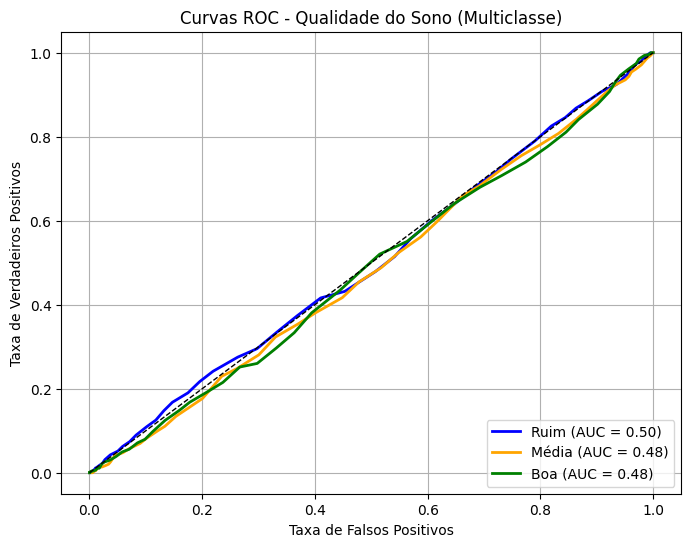

In [65]:
# Treina modelo com estratégia One-vs-Rest
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
modelo = OneVsRestClassifier(RandomForestClassifier(random_state=42))
from sklearn.preprocessing import label_binarize
classes = ['Ruim', 'Média', 'Boa']
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]
# Divide os dados
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Modelo com One-vs-Rest
modelo = OneVsRestClassifier(RandomForestClassifier(random_state=42))
modelo.fit(X_train, y_train_bin)

# Probabilidades preditas
y_score = modelo.predict_proba(X_test)

# Calcula curva ROC e AUC por classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plota curvas ROC
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC - Qualidade do Sono (Multiclasse)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [63]:
# 11. Curva ROC e AUC
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_prob = modelo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Bom')  # ou pos_label=1, dependendo do tipo
roc_auc = roc_auc_score(y_test, y_prob)
# 13. Mostrar AUC
print(f"AUC: {roc_auc:.2f}")

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: multi_class must be in ('ovo', 'ovr')

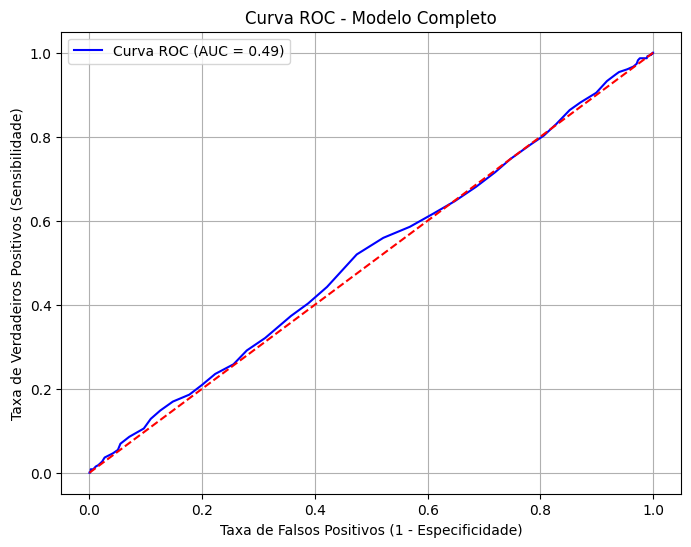

In [57]:
 #12. Plotar a Curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC - Modelo Completo')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
X = data_origin[['Work Hours (hrs/day)']]  # só essa variável
y = data_origin['Qualidade_Sono']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bom       0.42      0.40      0.41       608
        Ruim       0.61      0.62      0.61       892

    accuracy                           0.53      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.53      0.53      0.53      1500



In [44]:
# Para Produtividade
y2 = data_origin['Produtividade']
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=42)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print("Classificação para Produtividade:")
print(classification_report(y_test, y_pred))


# Para Estresse
y3 = data_origin['Estresse']
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.3, random_state=42)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print("Classificação para Estresse:")
print(classification_report(y_test, y_pred))


# Para Humor
y4 = data_origin['Humor']
X_train, X_test, y_train, y_test = train_test_split(X, y4, test_size=0.3, random_state=42)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print("Classificação para Humor:")
print(classification_report(y_test, y_pred))

Classificação para Produtividade:
              precision    recall  f1-score   support

         Bom       0.42      0.24      0.31       635
        Ruim       0.58      0.75      0.65       865

    accuracy                           0.54      1500
   macro avg       0.50      0.50      0.48      1500
weighted avg       0.51      0.54      0.51      1500

Classificação para Estresse:
              precision    recall  f1-score   support

         Bom       0.40      0.23      0.29       603
        Ruim       0.60      0.76      0.67       897

    accuracy                           0.55      1500
   macro avg       0.50      0.50      0.48      1500
weighted avg       0.52      0.55      0.52      1500

Classificação para Humor:
              precision    recall  f1-score   support

         Bom       0.40      0.13      0.20       597
        Ruim       0.60      0.87      0.71       903

    accuracy                           0.57      1500
   macro avg       0.50      0.50      